In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


np.random.seed(42)
m = 100
X = 2 * np.random.rand(m , 1)
y = 4 + 3 * X + np.random.randn(m, 1)

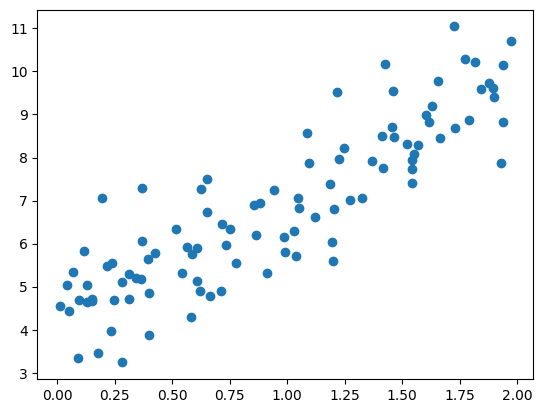

In [116]:
plt.scatter(X, y)

In [117]:
from sklearn.preprocessing import add_dummy_feature


X_b = add_dummy_feature(X)

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y



In [118]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [119]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

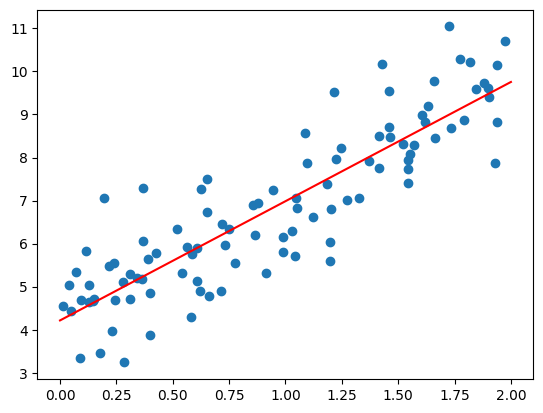

In [120]:
plt.plot(X_new, y_predict, "r-", label = 'Predictions')
plt.scatter(X, y)

In [121]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [122]:

 # * with scipy

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

In [123]:
np.linalg.pinv(X_b) @ y # * Moore Penrose Inverse

array([[4.21509616],
       [2.77011339]])

In [124]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # Number of instances

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2/ m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [125]:
theta

array([[4.21509616],
       [2.77011339]])

In [126]:

# * Stochastic gradient descent
n_epochs = 50 
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for Stochastic Gradient Descent do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients


In [127]:
theta

array([[4.21076011],
       [2.74856079]])

In [128]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01, 
                       n_iter_no_change = 100, random_state=42)
sgd_reg.fit(X, y.ravel())


# * Maximum of 1000 epochs (number of iterations of algorithim on training set)
# * Also might stop when the loss drops by less than 1e-5 during 100 epochs
# * starts with a learning rate of 0.01 eta


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [129]:
Algorithm = np.array(['normal_equation', 'SVD', 'Batch GD', 'Stochastic GD', 'Mini Batch GD'])
Large_m = np.array(['Fast', 'Fast', 'Slow', 'Fast', 'Fast'])
Out_of_core_support = np.array(['No', 'No', 'No', 'Yes', 'Yes'])
Large_n = np.array(['Slow', 'Slow', 'Fast', 'Fast', 'Fast'])
Hyperparams = np.array(['0', '0', '2', '>= 2', ">= 2"])
Scaling_required = np.array(['No', 'No', 'Yes', 'Yes', 'Yes'])
Scikit_learn = np.array(['N/A', 'Linear Regression', 'N/A', 'SGDRegressor', 'N/A'])

pd.DataFrame({"Algorithm" : Algorithm, 'Large m': Large_m, 'Out of Core Support': Out_of_core_support, "Large n" : Large_n, "Hyperparams" : Hyperparams, "Scaling_required": Scaling_required, 'Scikit-learn': Scikit_learn })

,Algorithm,Large m,Out of Core Support,Large n,Hyperparams,Scaling_required,Scikit-learn
0,normal_equation,Fast,No,Slow,0,No,N/A
1,SVD,Fast,No,Slow,0,No,Linear Regression
2,Batch GD,Slow,No,Fast,2,Yes,N/A
3,Stochastic GD,Fast,Yes,Fast,>= 2,Yes,SGDRegressor
4,Mini Batch GD,Fast,Yes,Fast,>= 2,Yes,N/A


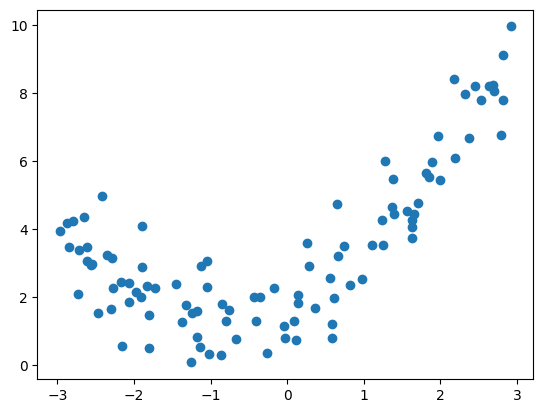

In [130]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
plt.scatter(X, y)

In [131]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [132]:
X[0], X_poly[0] # * returns the original feature + the original feature squared due to second degree polynomial

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

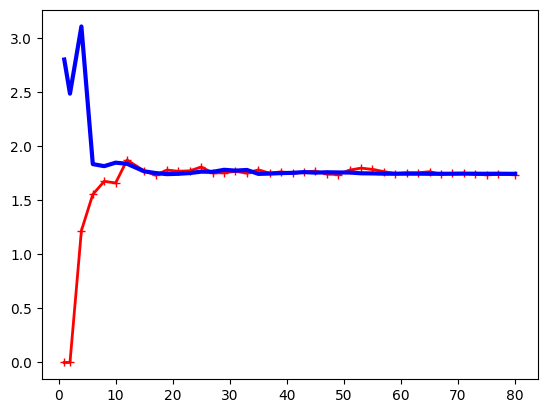

In [133]:

# * underfitting model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = "neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = 'train')
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = 'valid')
plt.show()

In [134]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree = 10, include_bias = False), LinearRegression())


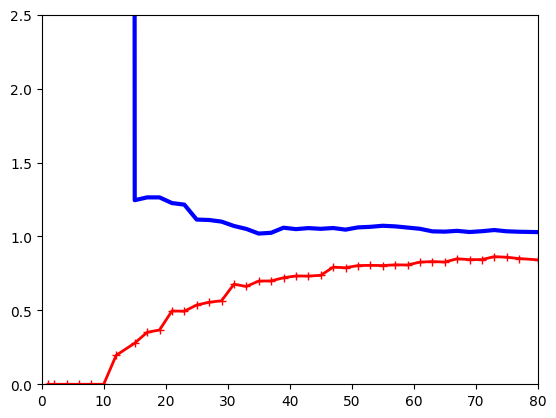

In [135]:

# * overfitting
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = 'neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = 'train')
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = 'valid')
plt.xlim([0,80])
plt.ylim([0,2.5])
plt.show()


In [136]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [137]:
sgd_reg = SGDRegressor(penalty="l2", alpha = 0.1 / m , tol = None, max_iter = 1000, eta0 = 0.01, random_state = 42)

sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.82830117])

In [138]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([4.77621741])

In [139]:
sgd_lasso_reg = SGDRegressor(penalty="l1", alpha = 0.1, tol = None, max_iter = 1000, eta0 = 0.01, random_state = 42)
sgd_lasso_reg.fit(X, y)
sgd_lasso_reg.predict([[1.5]])

c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.77557733])

In [140]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

In [141]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
list(iris)
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [142]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [143]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [145]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1) # * reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)

In [146]:
y_proba

array([[0.99820801, 0.00179199],
       [0.99818732, 0.00181268],
       [0.99816638, 0.00183362],
       ...,
       [0.00578965, 0.99421035],
       [0.00572381, 0.99427619],
       [0.00565872, 0.99434128]])

In [147]:
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0] # * nearest decision boundary from 0.5 that is greater than 0.5

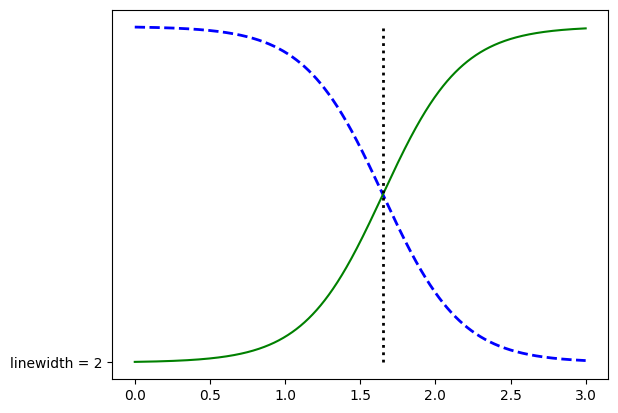

In [148]:
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2,
         label = "Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", "linewidth = 2", label = "Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth = 2, label = "Decision boundary")
plt.show()

In [149]:
log_reg.predict([[1.5], [1.7]])

array([False,  True])

In [151]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

softmax_reg = LogisticRegression(C = 30, random_state = 42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [162]:
softmax_reg.predict([[5,2]]) # * type 0 - 2

array([2])

In [163]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])